#                                           Energy Star Score Project

## Importing the Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [86]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [87]:
# Loading the dataset
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [88]:
df.isnull().sum()

Order                                                            0
Property Id                                                      0
Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                 11
NYC Borough, Block and Lot (BBL) self-reported                   0
NYC Building Identification Number (BIN)                         0
Address 1 (self-reported)                                        0
Address 2                                                        0
Postal Code                                                      0
Street Number                                                  124
Street Name                                                    122
Borough                                                        118
DOF Gross Floor Area                                          

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [90]:
df.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,11746.000000,11746.000000,11746.000000,1.174600e+04,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1948.738379,1.289971,98.762557,1.673739e+05,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,30.576386,4.017484,7.501603,3.189238e+05,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,1927.000000,1.000000,100.000000,6.699400e+04,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,1941.000000,1.000000,100.000000,9.408000e+04,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1966.000000,1.000000,100.000000,1.584140e+05,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,2019.000000,161.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


In [91]:
df.duplicated().sum()

0

In [92]:
# Checking the dependent variable
df['ENERGY STAR Score'].value_counts()

Not Available    2104
100               649
1                 299
99                162
80                144
84                142
83                138
86                138
88                136
73                128
87                128
82                128
89                127
79                126
85                126
81                126
93                125
92                124
74                124
77                123
98                122
90                120
78                119
95                119
67                119
76                118
68                118
69                114
65                112
91                112
64                110
71                110
70                110
97                109
75                108
94                108
59                108
55                103
66                102
60                102
96                102
63                102
57                101
72                101
58                 94
50        

In [93]:
# Dropping the rows where 'Not Available' is in the Target
df = df[df['ENERGY STAR Score']!= 'Not Available']

In [94]:
df.shape

(9642, 60)

In [95]:
# Checking the number of unique values in each column
for col in df.columns:
    print(col , " : ",df[col].nunique())

Order  :  9642
Property Id  :  9642
Property Name  :  9638
Parent Property Id  :  82
Parent Property Name  :  82
BBL - 10 digits  :  9567
NYC Borough, Block and Lot (BBL) self-reported  :  9568
NYC Building Identification Number (BIN)  :  9468
Address 1 (self-reported)  :  9584
Address 2  :  126
Postal Code  :  266
Street Number  :  3772
Street Name  :  1872
Borough  :  5
DOF Gross Floor Area  :  7783
Primary Property Type - Self Selected  :  25
List of All Property Use Types at Property  :  494
Largest Property Use Type  :  19
Largest Property Use Type - Gross Floor Area (ft²)  :  7863
2nd Largest Property Use Type  :  54
2nd Largest Property Use - Gross Floor Area (ft²)  :  1509
3rd Largest Property Use Type  :  44
3rd Largest Property Use Type - Gross Floor Area (ft²)  :  558
Year Built  :  150
Number of Buildings - Self-reported  :  45
Occupancy  :  17
Metered Areas (Energy)  :  3
Metered Areas  (Water)  :  6
ENERGY STAR Score  :  100
Site EUI (kBtu/ft²)  :  1780
Weather Normalized

# Observations:
* Columns need to drop - Order, Order, Property Id, Property Name, Parent Property Id, Parent Property Name
* Columns giving location information - Address 1 (self-reported), Address 2, Postal Code, Street Number, Street Name, Borough, Latitude, Longitude
* Columns containing identification information of the buildings - BBL - 10 digits, NYC Borough, Block and Lot (BBL) self-reported, NYC Building Identification Number (BIN)
* Extra Columns : 
 * Number of Buildings - Self-reported
 * Release Date
 * DOF Benchmarking Submission Status
 * Community Board, Council District, Census Tract, NTA

In [96]:
# Dropping the columns:
df.drop(['Order', 'Property Id', 'Property Name', 'Parent Property Id', 'Parent Property Name','Address 1 (self-reported)',
         'Address 2', 'Postal Code','Street Number', 'Street Name', 'Borough', 'Latitude', 'Longitude',
        'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported', 'NYC Building Identification Number (BIN)',
        'Number of Buildings - Self-reported','Release Date','DOF Benchmarking Submission Status',
         'Community Board', 'Council District', 'Census Tract', 'NTA'], axis = 1, inplace=True)

In [97]:
df.head()

,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Water Required?
1,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,No
5,2230742.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),2971874,Not Available,Not Available,Not Available,Not Available,1932,100,Whole Building,Whole Building,55,359.9,359,8.3,4.8,411.5,Not Available,2.00832154E7,Not Available,Not Available,Not Available,-4.690796909E8,1.4322508769E9,1.43225088E7,86335350.5,2.45508594E7,54429.8,77564.1,-23134.3,2971874,Not Available,Not Available,414.2,No
12,NaN,Multifamily Housing,"Multifamily Housing, Other, Parking",Multifamily Housing,412503,Other,20000,Parking,18800,1903,100,Whole Building,Whole Building,93,32,Not Available,7.5,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,2047200,20472,11241926.1,3249755.2,1194,150.8,1043.2,432503,22061,51.01,87.9,Yes
13,212656.0,Multifamily Housing,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,162656,Parking,40000,Retail Store,10000,1903,100,Whole Building,Not Available,1,295.4,316.8,5.8,3,374.2,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,4.75229012E7,512710.7,3477064.5,1004824,2846.8,2524.2,322.7,172656,Not Available,Not Available,352.2,NaN
14,NaN,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),567517,Not Available,Not Available,Not Available,Not Available,1950,100,Whole Building,Whole Building,80,352.7,Not Available,32.2,2.2,Not Available,Not Available,9230304.1,Not Available,Not Available,Not Available,Not Available,1.284867131E8,1255514.1,62425429.2,1.82958446E7,13302.6,7509.5,5793.1,567517,9574,16.87,599.5,No


# Observations:
Total GHG Emissions (Metric Tons CO2e) = Direct GHG Emissions (Metric Tons CO2e) + Indirect GHG Emissions (Metric Tons CO2e)

DOF Gross Floor Area & Property GFA - Self-Reported (ft²) are same

Water Intensity (All Water Sources) (gal/ft²) = Water Use (All Water Sources) (kgal)/Property GFA - Self-Reported (ft²)

In [98]:
df = df.drop(['Direct GHG Emissions (Metric Tons CO2e)','Indirect GHG Emissions (Metric Tons CO2e)',
             'DOF Gross Floor Area','Water Use (All Water Sources) (kgal)'], axis = 1)

In [99]:
df.head()

,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Water Required?
1,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,3889181,Not Available,404.3,No
5,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),2971874,Not Available,Not Available,Not Available,Not Available,1932,100,Whole Building,Whole Building,55,359.9,359,8.3,4.8,411.5,Not Available,2.00832154E7,Not Available,Not Available,Not Available,-4.690796909E8,1.4322508769E9,1.43225088E7,86335350.5,2.45508594E7,54429.8,2971874,Not Available,414.2,No
12,Multifamily Housing,"Multifamily Housing, Other, Parking",Multifamily Housing,412503,Other,20000,Parking,18800,1903,100,Whole Building,Whole Building,93,32,Not Available,7.5,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,2047200,20472,11241926.1,3249755.2,1194,432503,51.01,87.9,Yes
13,Multifamily Housing,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,162656,Parking,40000,Retail Store,10000,1903,100,Whole Building,Not Available,1,295.4,316.8,5.8,3,374.2,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,4.75229012E7,512710.7,3477064.5,1004824,2846.8,172656,Not Available,352.2,NaN
14,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),567517,Not Available,Not Available,Not Available,Not Available,1950,100,Whole Building,Whole Building,80,352.7,Not Available,32.2,2.2,Not Available,Not Available,9230304.1,Not Available,Not Available,Not Available,Not Available,1.284867131E8,1255514.1,62425429.2,1.82958446E7,13302.6,567517,16.87,599.5,No


# Observations:-
Weather Normalized Site Electricity Intensity (kWh/ft²) = Weather Normalized Site Electricity (kWh)/Property GFA - Self-Reported (ft²)

Weather Normalized Site Natural Gas Intensity (therms/ft²) = Weather Normalized Site Natural Gas Use (therms)/Property GFA - Self-Reported (ft²)

Site EUI (kBtu/ft²) = (Fuel Oil #1 Use (kBtu)+Fuel Oil #2 Use (kBtu)+Fuel Oil #4 Use (kBtu)+Fuel Oil #5 & 6 Use (kBtu)+
                       Diesel #2 Use (kBtu)+District Steam Use (kBtu)+Natural Gas Use (kBtu)+Electricity Use - Grid Purchase                            (kBtu))/Property GFA - Self-Reported (ft²)
  
  
'Primary Property Type - Self Selected' & 'Largest Property Use Type' are same  
Information in column 'List of All Property Use Types at Property' is given in other columns

In [100]:
df = df.drop(['Weather Normalized Site Electricity (kWh)','Weather Normalized Site Natural Gas Use (therms)'], axis = 1)

In [101]:
df = df.drop(['Fuel Oil #1 Use (kBtu)','Fuel Oil #2 Use (kBtu)','Fuel Oil #4 Use (kBtu)','Fuel Oil #5 & 6 Use (kBtu)',
              'Diesel #2 Use (kBtu)','District Steam Use (kBtu)','Natural Gas Use (kBtu)','Electricity Use - Grid Purchase (kBtu)','Water Required?',
             'Primary Property Type - Self Selected','List of All Property Use Types at Property'], axis = 1)

In [102]:
df.head()

,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²)
1,Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,55870.4,3889181,Not Available,404.3
5,Hospital (General Medical & Surgical),2971874,Not Available,Not Available,Not Available,Not Available,1932,100,Whole Building,Whole Building,55,359.9,359,8.3,4.8,411.5,54429.8,2971874,Not Available,414.2
12,Multifamily Housing,412503,Other,20000,Parking,18800,1903,100,Whole Building,Whole Building,93,32,Not Available,7.5,0,Not Available,1194,432503,51.01,87.9
13,Multifamily Housing,162656,Parking,40000,Retail Store,10000,1903,100,Whole Building,Not Available,1,295.4,316.8,5.8,3,374.2,2846.8,172656,Not Available,352.2
14,Hospital (General Medical & Surgical),567517,Not Available,Not Available,Not Available,Not Available,1950,100,Whole Building,Whole Building,80,352.7,Not Available,32.2,2.2,Not Available,13302.6,567517,16.87,599.5


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 1 to 11745
Data columns (total 20 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Largest Property Use Type                                   9642 non-null   object
 1   Largest Property Use Type - Gross Floor Area (ft²)          9642 non-null   object
 2   2nd Largest Property Use Type                               9642 non-null   object
 3   2nd Largest Property Use - Gross Floor Area (ft²)           9642 non-null   object
 4   3rd Largest Property Use Type                               9642 non-null   object
 5   3rd Largest Property Use Type - Gross Floor Area (ft²)      9642 non-null   object
 6   Year Built                                                  9642 non-null   int64 
 7   Occupancy                                                   9642 non-null   int64 
 8   Metered

# Columns having 'Not Available' records - 

Metered Areas (Energy)  :  4

Metered Areas  (Water)  :  3741

Weather Normalized Site EUI (kBtu/ft²)  :  1098

Weather Normalized Site Electricity Intensity (kWh/ft²)  :  492

Weather Normalized Site Natural Gas Intensity (therms/ft²)  :  1413

Weather Normalized Source EUI (kBtu/ft²)  :  1098


Direct GHG Emissions (Metric Tons CO2e)  :  13

Water Intensity (All Water Sources) (gal/ft²)  :  3114


In [104]:
# Converting 'Not Available' to missing value (NaN)

In [105]:
df.replace('Not Available', np.nan, inplace=True)

In [106]:
df.isnull().sum()

Largest Property Use Type                                        0
Largest Property Use Type - Gross Floor Area (ft²)               0
2nd Largest Property Use Type                                 7263
2nd Largest Property Use - Gross Floor Area (ft²)             7263
3rd Largest Property Use Type                                 8868
3rd Largest Property Use Type - Gross Floor Area (ft²)        8868
Year Built                                                       0
Occupancy                                                        0
Metered Areas (Energy)                                           4
Metered Areas  (Water)                                        3741
ENERGY STAR Score                                                0
Site EUI (kBtu/ft²)                                              0
Weather Normalized Site EUI (kBtu/ft²)                        1098
Weather Normalized Site Electricity Intensity (kWh/ft²)        492
Weather Normalized Site Natural Gas Intensity (therms/ft²)    

In [ ]:
# Converting the data types of columns to float : 

In [107]:
df['Largest Property Use Type - Gross Floor Area (ft²)'] = df['Largest Property Use Type - Gross Floor Area (ft²)'].astype(float)
df['2nd Largest Property Use - Gross Floor Area (ft²)'] = df['2nd Largest Property Use - Gross Floor Area (ft²)'].astype(float)
df['3rd Largest Property Use Type - Gross Floor Area (ft²)'] = df['3rd Largest Property Use Type - Gross Floor Area (ft²)'].astype(float)
df['Year Built'] = df['Year Built'].astype(str)
df['ENERGY STAR Score'] = df['ENERGY STAR Score'].astype(int)
df['Site EUI (kBtu/ft²)'] = df['Site EUI (kBtu/ft²)'].astype(float)
df['Weather Normalized Site EUI (kBtu/ft²)'] = df['Weather Normalized Site EUI (kBtu/ft²)'].astype(float)
df['Weather Normalized Site Electricity Intensity (kWh/ft²)'] = df['Weather Normalized Site Electricity Intensity (kWh/ft²)'].astype(float)
df['Weather Normalized Source EUI (kBtu/ft²)'] = df['Weather Normalized Source EUI (kBtu/ft²)'].astype(float)
df['Total GHG Emissions (Metric Tons CO2e)'] = df['Total GHG Emissions (Metric Tons CO2e)'].astype(float)
df['Water Intensity (All Water Sources) (gal/ft²)'] = df['Water Intensity (All Water Sources) (gal/ft²)'].astype(float)
df['Source EUI (kBtu/ft²)'] = df['Source EUI (kBtu/ft²)'].astype(float)
df['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = df['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].astype(float)

In [108]:
df.drop(['Metered Areas (Energy)','Metered Areas  (Water)'],axis = 1, inplace = True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 1 to 11745
Data columns (total 18 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Largest Property Use Type                                   9642 non-null   object 
 1   Largest Property Use Type - Gross Floor Area (ft²)          9642 non-null   float64
 2   2nd Largest Property Use Type                               2379 non-null   object 
 3   2nd Largest Property Use - Gross Floor Area (ft²)           2379 non-null   float64
 4   3rd Largest Property Use Type                               774 non-null    object 
 5   3rd Largest Property Use Type - Gross Floor Area (ft²)      774 non-null    float64
 6   Year Built                                                  9642 non-null   object 
 7   Occupancy                                                   9642 non-null   int64  
 8

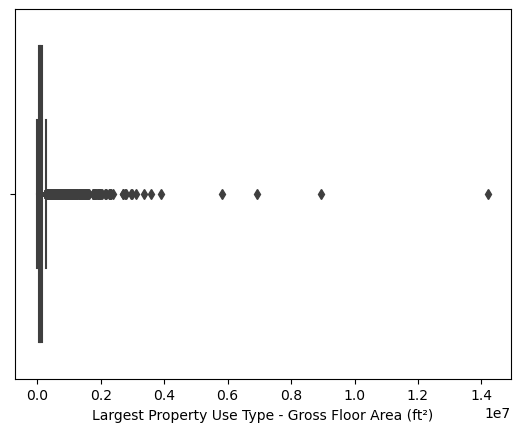

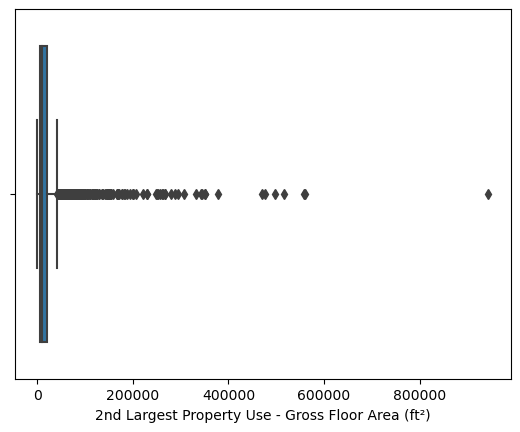

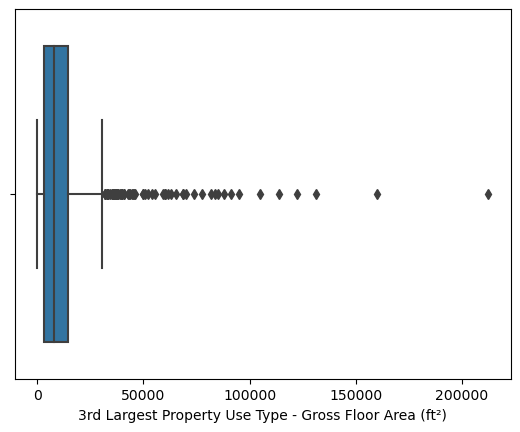

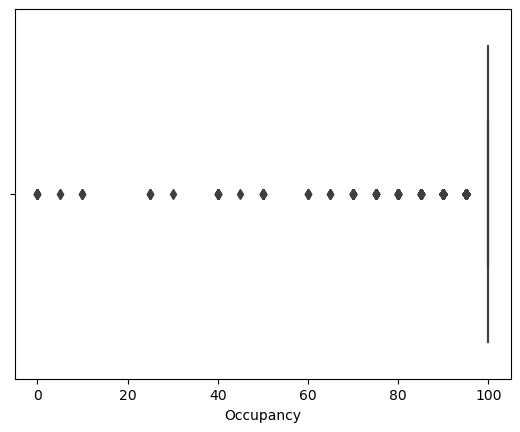

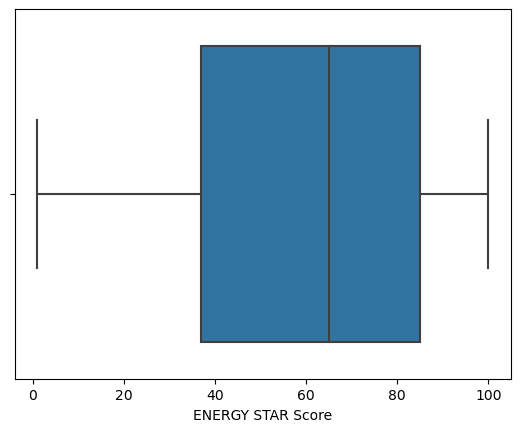

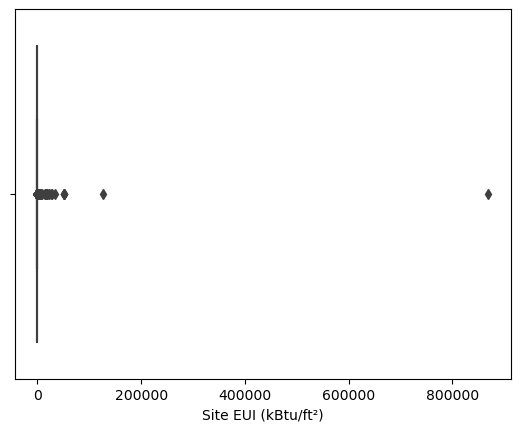

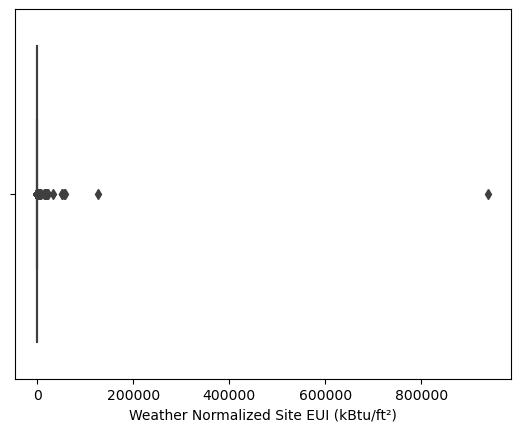

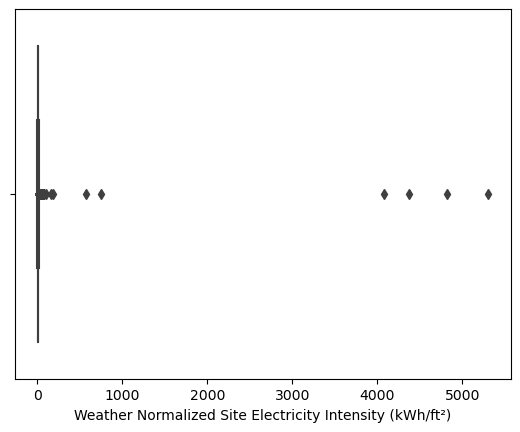

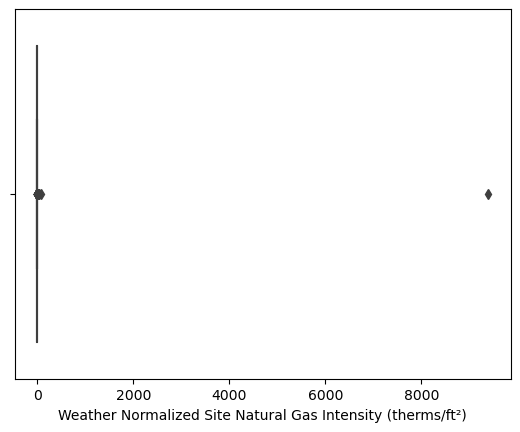

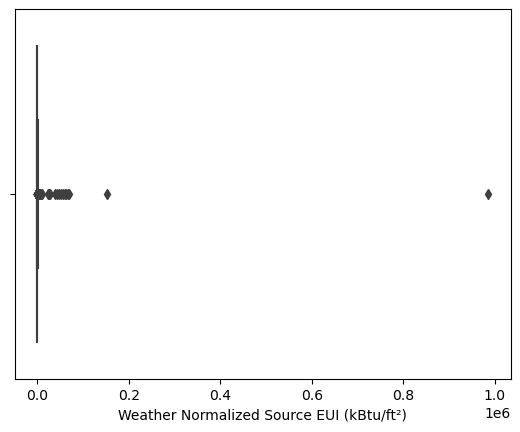

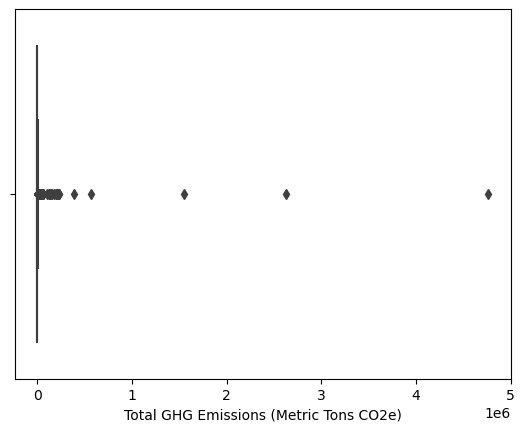

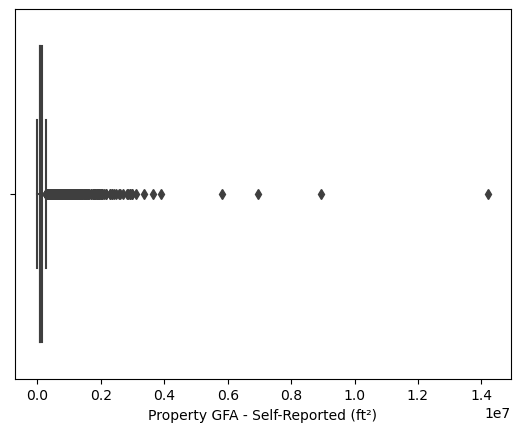

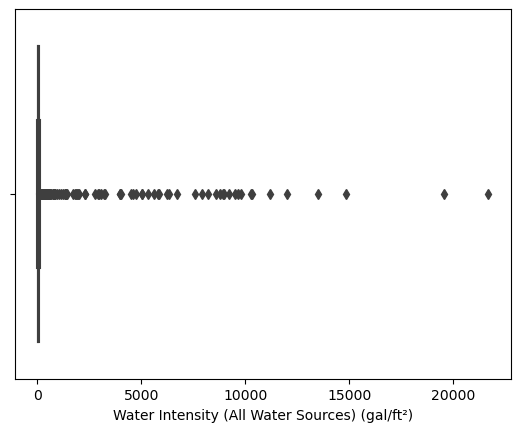

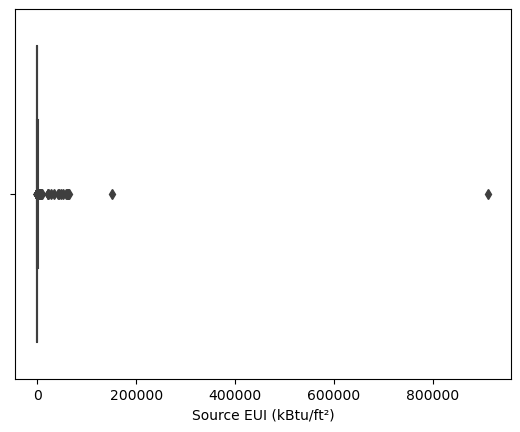

In [110]:
# Checking the boxplots:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

# Handling the missing value

In [111]:
# 2nd Largest Property Use Type 3rd Largest Property Use Type with none
df['2nd Largest Property Use Type'].fillna('none',inplace=True)
df['3rd Largest Property Use Type'].fillna('none',inplace=True)

In [112]:
df['3rd Largest Property Use Type'].isnull().sum()

0

In [113]:
# Filliing the missing values in 2nd Largest Property Use - Gross Floor Area (ft²) with zero- as value in column type is none
df['2nd Largest Property Use - Gross Floor Area (ft²)'].fillna(0,inplace=True)
df['3rd Largest Property Use Type - Gross Floor Area (ft²)'].fillna(0,inplace=True)

In [114]:
df.head()

,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²)
1,Hospital (General Medical & Surgical),3889181.0,none,0.0,none,0.0,1969,100,55,229.8,228.8,24.8,2.4,401.1,55870.4,3889181,NaN,404.3
5,Hospital (General Medical & Surgical),2971874.0,none,0.0,none,0.0,1932,100,55,359.9,359.0,8.3,4.8,411.5,54429.8,2971874,NaN,414.2
12,Multifamily Housing,412503.0,Other,20000.0,Parking,18800.0,1903,100,93,32.0,NaN,7.5,0.0,NaN,1194.0,432503,51.01,87.9
13,Multifamily Housing,162656.0,Parking,40000.0,Retail Store,10000.0,1903,100,1,295.4,316.8,5.8,3.0,374.2,2846.8,172656,NaN,352.2
14,Hospital (General Medical & Surgical),567517.0,none,0.0,none,0.0,1950,100,80,352.7,NaN,32.2,2.2,NaN,13302.6,567517,16.87,599.5


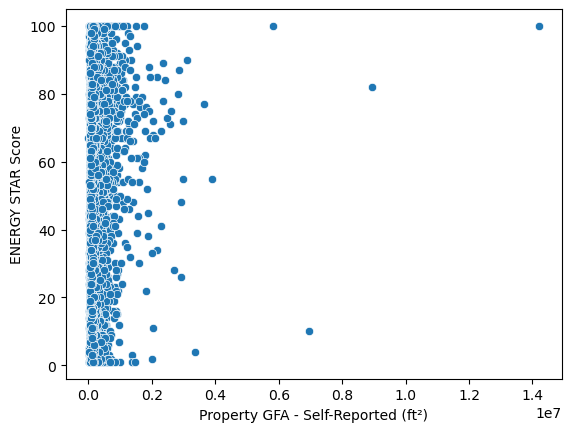

In [115]:
sns.scatterplot(df['Property GFA - Self-Reported (ft²)'], df['ENERGY STAR Score'])
plt.show()

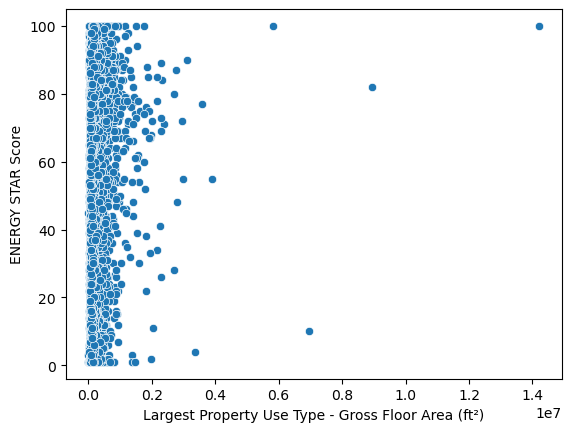

In [116]:
sns.scatterplot(df['Largest Property Use Type - Gross Floor Area (ft²)'], df['ENERGY STAR Score'])
plt.show()

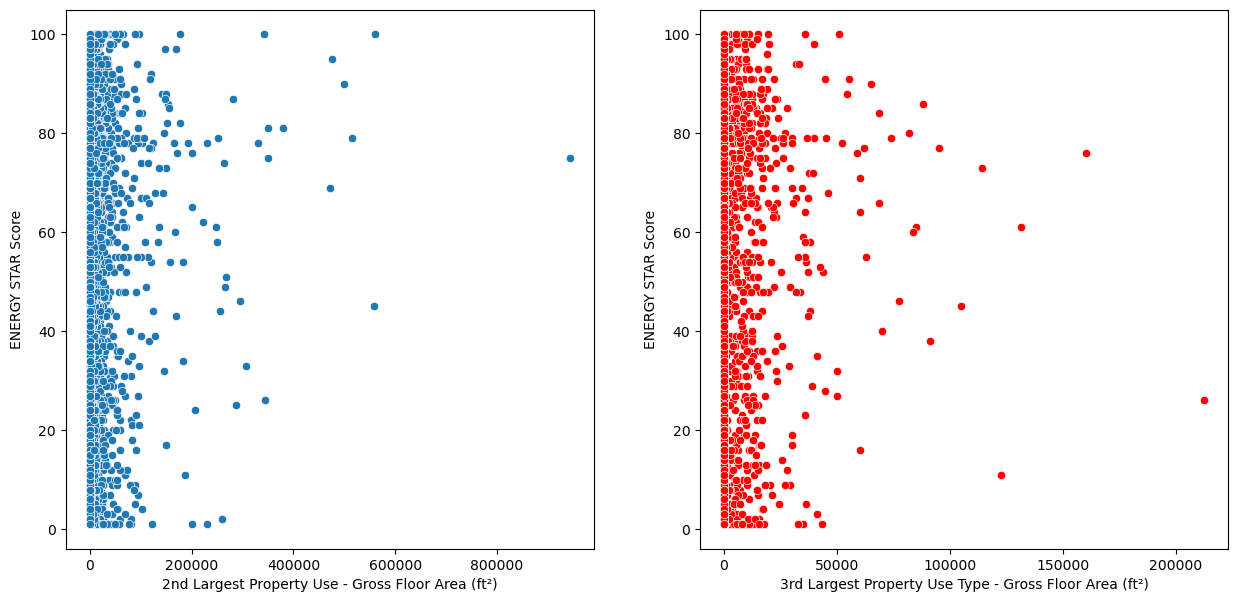

In [117]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.scatterplot(df['2nd Largest Property Use - Gross Floor Area (ft²)'], df['ENERGY STAR Score'])
plt.subplot(122)
sns.scatterplot(df['3rd Largest Property Use Type - Gross Floor Area (ft²)'], df['ENERGY STAR Score'], color='red')
plt.show()

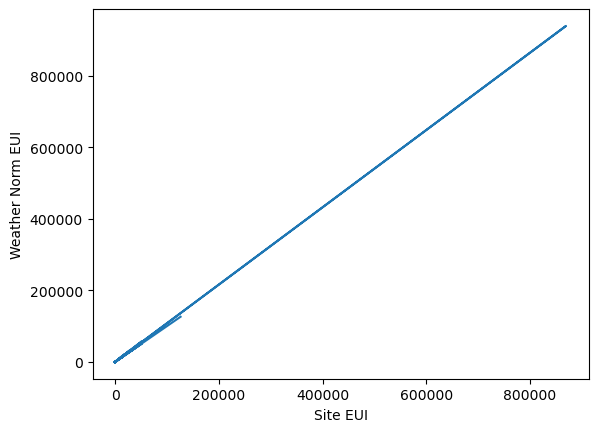

In [118]:
plt.plot(df['Site EUI (kBtu/ft²)'], df['Weather Normalized Site EUI (kBtu/ft²)'])
plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')
plt.show()

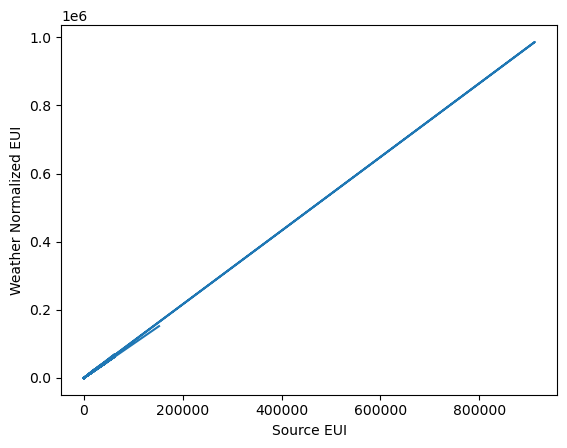

In [119]:
plt.plot(df['Source EUI (kBtu/ft²)'], df['Weather Normalized Source EUI (kBtu/ft²)'])
plt.xlabel('Source EUI')
plt.ylabel('Weather Normalized EUI')
plt.show()

In [120]:
# Dropping the two columns - Weather Normalized Source EUI (kBtu/ft²), Weather Normalized Site EUI (kBtu/ft²)

df = df.drop(['Weather Normalized Site EUI (kBtu/ft²)','Weather Normalized Source EUI (kBtu/ft²)'], axis = 1)

In [121]:
# Filling the other columns missing values with median value

df['Weather Normalized Site Electricity Intensity (kWh/ft²)'] = df['Weather Normalized Site Electricity Intensity (kWh/ft²)'].fillna(df['Weather Normalized Site Electricity Intensity (kWh/ft²)'].median())
df['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = df['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].fillna(df['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].median())

df['Total GHG Emissions (Metric Tons CO2e)'] = df['Total GHG Emissions (Metric Tons CO2e)'].fillna(df['Total GHG Emissions (Metric Tons CO2e)'].median())
df['Water Intensity (All Water Sources) (gal/ft²)'] = df['Water Intensity (All Water Sources) (gal/ft²)'].fillna(df['Water Intensity (All Water Sources) (gal/ft²)'].median())

In [122]:
df.isnull().sum()

Largest Property Use Type                                     0
Largest Property Use Type - Gross Floor Area (ft²)            0
2nd Largest Property Use Type                                 0
2nd Largest Property Use - Gross Floor Area (ft²)             0
3rd Largest Property Use Type                                 0
3rd Largest Property Use Type - Gross Floor Area (ft²)        0
Year Built                                                    0
Occupancy                                                     0
ENERGY STAR Score                                             0
Site EUI (kBtu/ft²)                                           0
Weather Normalized Site Electricity Intensity (kWh/ft²)       0
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0
Total GHG Emissions (Metric Tons CO2e)                        0
Property GFA - Self-Reported (ft²)                            0
Water Intensity (All Water Sources) (gal/ft²)                 0
Source EUI (kBtu/ft²)                   

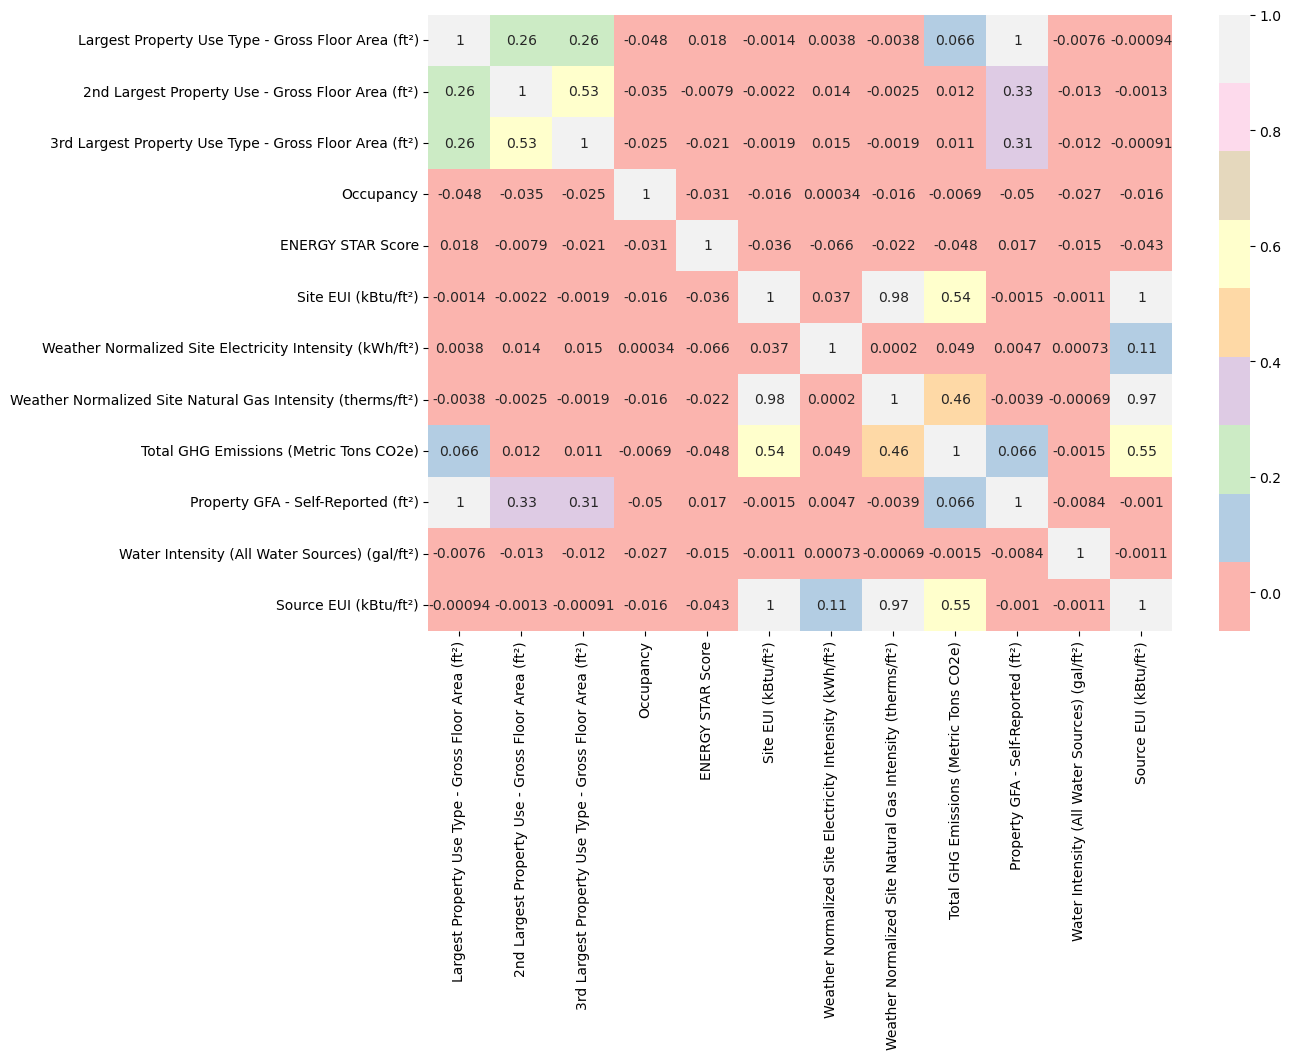

In [206]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot =True, cmap = 'Pastel1')
plt.show()

In [124]:
df['Largest Property Use Type'].value_counts()

Multifamily Housing                      7529
Office                                   1193
Hotel                                     215
Non-Refrigerated Warehouse                159
K-12 School                                98
Residence Hall/Dormitory                   97
Senior Care Community                      92
Retail Store                               64
Distribution Center                        62
Hospital (General Medical & Surgical)      41
Medical Office                             29
Supermarket/Grocery Store                  19
Financial Office                           15
Worship Facility                            9
Refrigerated Warehouse                      9
Wholesale Club/Supercenter                  4
Parking                                     3
Bank Branch                                 2
Courthouse                                  2
Name: Largest Property Use Type, dtype: int64

In [125]:
df['2nd Largest Property Use Type'].value_counts()

none                                                     7263
Parking                                                   702
Retail Store                                              553
Other                                                     307
Office                                                    167
Medical Office                                            112
Restaurant                                                 70
Financial Office                                           54
Urgent Care/Clinic/Other Outpatient                        42
Bank Branch                                                34
Multifamily Housing                                        28
Supermarket/Grocery Store                                  24
Other - Services                                           24
Outpatient Rehabilitation/Physical Therapy                 22
Non-Refrigerated Warehouse                                 19
Data Center                                                18
Other - 

In [126]:
df['3rd Largest Property Use Type'].value_counts()

none                                                     8868
Retail Store                                              132
Other                                                     130
Parking                                                   130
Restaurant                                                 62
Office                                                     46
Medical Office                                             44
Financial Office                                           33
Bank Branch                                                21
Supermarket/Grocery Store                                  15
Fast Food Restaurant                                       14
Swimming Pool                                              13
Urgent Care/Clinic/Other Outpatient                        13
Data Center                                                12
Food Service                                               11
Other - Entertainment/Public Assembly                      10
Personal

Office : - Medical Office, Financial Office,Bank Branch, Mailing Center/Post Office, Data Center, Automobile Dealership, Courthouse, Office

School : - Adult Education, Library,K-12 School, Pre-school/Daycare, Other - Education, College/University, 

Retail Store : - Supermarket/Grocery Store, Other - Mall, Wholesale Club/Supercenter, Repair Services (Vehicle, Shoe, Locksmith, etc.), Enclosed Mall, Personal Services (Health/Beauty, Dry Cleaning, etc.), Food Sales,

HOSPITAL: - Outpatient Rehabilitation/Physical Therapy, Ambulatory Surgical Center, Other - Specialty Hospital, Urgent Care/Clinic/Other Outpatient,Hospital (General Medical & Surgical)

Entertainment : - Bowling Alley, Social/Meeting Hall, Fitness Center/Health Club/Gym, Other - Recreation, Other - Entertainment/Public Assembly, Performing Arts, Vocational School, Bar/Nightclub, Museum, Fast Food Restaurant, Food Service, Other - Restaurant/Bar,

Storage : - Self-Storage Facility, Non-Refrigerated Warehouse, Distribution Center,Convenience Store without Gas Station

Other : - Other - Services, Other - Public Services,Swimming Pool, Parking, Other - Utility, Other

Residential : - Residence Hall/Dormitory, Other - Lodging/Residential, Senior Care Community, Worship Facility,Multifamily Housing, Hotel,

Manufacturing :- Manufacturing/Industrial Plant, Laboratory,Refrigerated Warehouse

In [127]:
# Clubbing the values into one type :
mydict = {'office': ['Medical Office', 'Financial Office','Bank Branch', 'Mailing Center/Post Office', 'Data Center', 'Automobile Dealership', 'Courthouse', 'Office'],
'school':['Adult Education', 'Library','K-12 School', 'Pre-school/Daycare', 'Other - Education','College/University'],
'retail_store': ['Retail Store','Supermarket/Grocery Store','Other - Mall','Wholesale Club/Supercenter','Repair Services (Vehicle, Shoe, Locksmith, etc.)','Enclosed Mall','Personal Services (Health/Beauty, Dry Cleaning, etc.)','Food Sales'],
'hospital':['Outpatient Rehabilitation/Physical Therapy', 'Ambulatory Surgical Center', 'Other - Specialty Hospital', 'Urgent Care/Clinic/Other Outpatient','Hospital (General Medical & Surgical)'],
'recreation':['Restaurant','Bowling Alley','Social/Meeting Hall', 'Fitness Center/Health Club/Gym', 'Other - Recreation', 'Other - Entertainment/Public Assembly', 'Performing Arts', 'Vocational School', 'Bar/Nightclub', 'Museum', 'Fast Food Restaurant', 'Food Service', 'Other - Restaurant/Bar'],
'storage':['Self-Storage Facility', 'Non-Refrigerated Warehouse', 'Distribution Center','Convenience Store without Gas Station'],
'other':['Other - Services', 'Other - Public Services','Swimming Pool', 'Parking', 'Other - Utility', 'Other'],
'resident':['Residence Hall/Dormitory', 'Other - Lodging/Residential', 'Senior Care Community', 'Worship Facility','Multifamily Housing', 'Hotel'],
'manufacturing':['Manufacturing/Industrial Plant', 'Laboratory','Refrigerated Warehouse']}


In [128]:
def club(x):
    for i in mydict:
        if x in mydict[i]:
            x = i
        else:
            x = x
    return x

In [129]:
df['Largest Property Use Type'] = df['Largest Property Use Type'].apply(club)

In [130]:
df['2nd Largest Property Use Type'] = df['2nd Largest Property Use Type'].apply(club)

In [131]:
df['3rd Largest Property Use Type'] = df['3rd Largest Property Use Type'].apply(club)

In [132]:
df['Largest Property Use Type'].value_counts()

resident         7942
office           1241
storage           221
school             98
retail_store       87
hospital           41
manufacturing       9
other               3
Name: Largest Property Use Type, dtype: int64

In [133]:
df['2nd Largest Property Use Type'].value_counts()

none             7263
other            1044
retail_store      587
office            388
recreation        158
hospital           65
resident           51
storage            41
school             37
manufacturing       8
Name: 2nd Largest Property Use Type, dtype: int64

In [134]:
df['3rd Largest Property Use Type'].value_counts()

none            8868
other            276
retail_store     166
office           159
recreation       122
school            18
hospital          18
storage           11
resident           4
Name: 3rd Largest Property Use Type, dtype: int64

In [135]:
df.head()

,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²)
1,hospital,3889181.0,none,0.0,none,0.0,1969,100,55,229.8,24.8,2.4,55870.4,3889181,47.19,404.3
5,hospital,2971874.0,none,0.0,none,0.0,1932,100,55,359.9,8.3,4.8,54429.8,2971874,47.19,414.2
12,resident,412503.0,other,20000.0,other,18800.0,1903,100,93,32.0,7.5,0.0,1194.0,432503,51.01,87.9
13,resident,162656.0,other,40000.0,retail_store,10000.0,1903,100,1,295.4,5.8,3.0,2846.8,172656,47.19,352.2
14,hospital,567517.0,none,0.0,none,0.0,1950,100,80,352.7,32.2,2.2,13302.6,567517,16.87,599.5


In [136]:
df.shape

(9642, 16)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 1 to 11745
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Largest Property Use Type                                   9642 non-null   object 
 1   Largest Property Use Type - Gross Floor Area (ft²)          9642 non-null   float64
 2   2nd Largest Property Use Type                               9642 non-null   object 
 3   2nd Largest Property Use - Gross Floor Area (ft²)           9642 non-null   float64
 4   3rd Largest Property Use Type                               9642 non-null   object 
 5   3rd Largest Property Use Type - Gross Floor Area (ft²)      9642 non-null   float64
 6   Year Built                                                  9642 non-null   object 
 7   Occupancy                                                   9642 non-null   int64  
 8

In [138]:
df['Year Built'].value_counts()

1928    360
1927    354
1929    325
1930    294
1931    280
1925    261
1926    260
1963    238
1920    223
1962    222
1940    201
1960    185
1924    179
1939    176
1961    157
1950    151
1964    146
1941    142
1910    141
1937    130
1900    128
1923    124
1959    122
1951    111
1970    110
2007    108
1938    107
1965    107
1952    103
2008    103
1954    102
1955    101
1958     97
2009     96
1935     96
1922     91
2006     89
1956     86
1953     86
1932     84
1915     82
1949     82
2005     81
1957     79
1986     79
1936     76
1912     72
1985     70
1966     65
1972     65
1911     65
1967     62
1969     60
1913     59
2010     59
2003     58
1942     56
2000     56
1948     55
2012     54
1988     53
1974     52
2013     52
1987     52
1980     51
1921     49
1914     49
1973     49
1989     47
1916     46
1971     45
1983     44
1968     44
2002     43
1975     42
2004     42
1905     42
1917     40
1909     39
1990     38
2011     38
2001     37
1908     36
1907

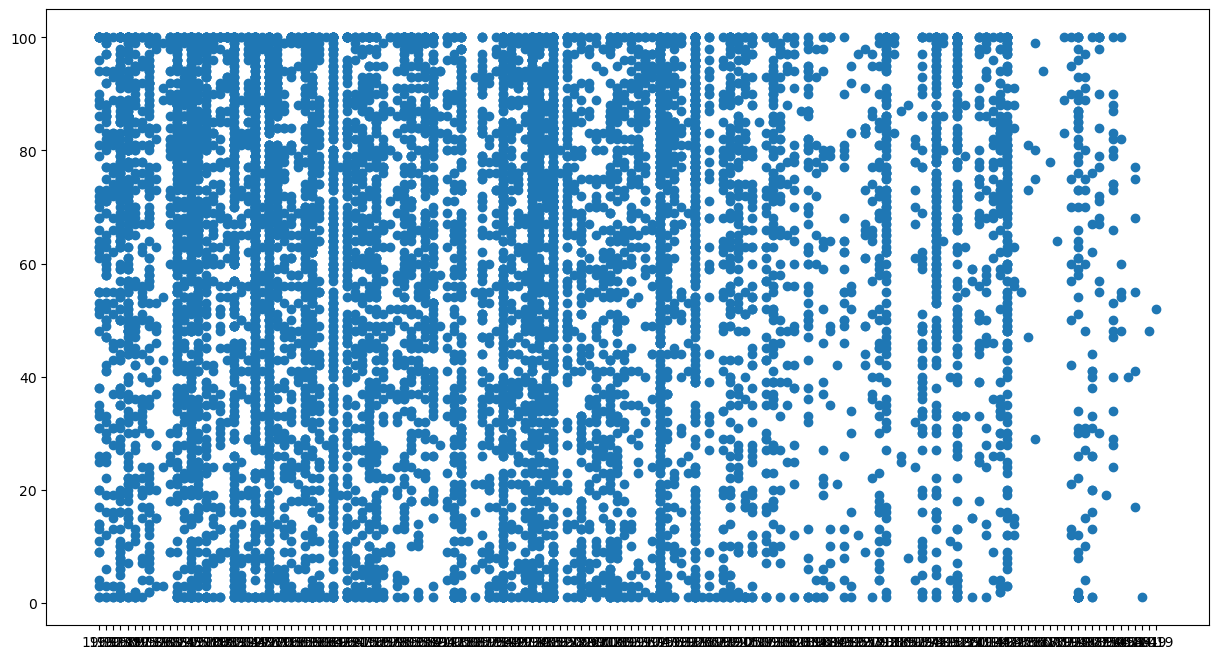

In [139]:
plt.figure(figsize=(15,8))
plt.scatter(df['Year Built'], df['ENERGY STAR Score'])
plt.show()

### Converting the 'Year Built' into three category - old, moderate, new

In [140]:
def year_club(x):
    if x>=1928 & x<=1958:
        y = 'old'
    elif x>=1959 & x<=1988:
        y = 'moderate'
    else:
        y = 'new'
    return y

In [141]:
df['Year Built'] = df['Year Built'].astype(int)
df['Year Built'] = df['Year Built'].apply(year_club)

In [142]:
df.head()

,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²)
1,hospital,3889181.0,none,0.0,none,0.0,old,100,55,229.8,24.8,2.4,55870.4,3889181,47.19,404.3
5,hospital,2971874.0,none,0.0,none,0.0,old,100,55,359.9,8.3,4.8,54429.8,2971874,47.19,414.2
12,resident,412503.0,other,20000.0,other,18800.0,old,100,93,32.0,7.5,0.0,1194.0,432503,51.01,87.9
13,resident,162656.0,other,40000.0,retail_store,10000.0,old,100,1,295.4,5.8,3.0,2846.8,172656,47.19,352.2
14,hospital,567517.0,none,0.0,none,0.0,old,100,80,352.7,32.2,2.2,13302.6,567517,16.87,599.5


# Outlier Treatment

In [177]:
df_out = df.copy()

In [178]:
df_out.head()

,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²)
1,hospital,3889181.0,none,0.0,none,0.0,old,100,55,229.8,24.8,2.4,55870.4,3889181,47.19,404.3
5,hospital,2971874.0,none,0.0,none,0.0,old,100,55,359.9,8.3,4.8,54429.8,2971874,47.19,414.2
12,resident,412503.0,other,20000.0,other,18800.0,old,100,93,32.0,7.5,0.0,1194.0,432503,51.01,87.9
13,resident,162656.0,other,40000.0,retail_store,10000.0,old,100,1,295.4,5.8,3.0,2846.8,172656,47.19,352.2
14,hospital,567517.0,none,0.0,none,0.0,old,100,80,352.7,32.2,2.2,13302.6,567517,16.87,599.5


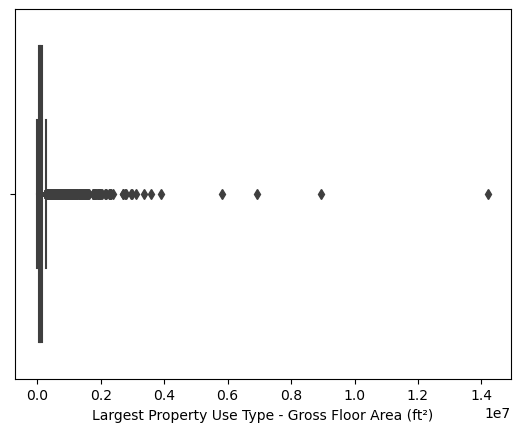

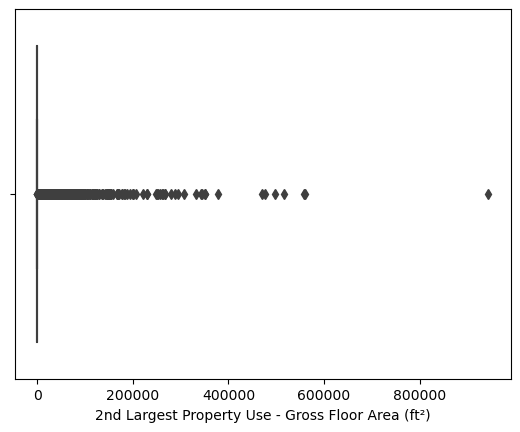

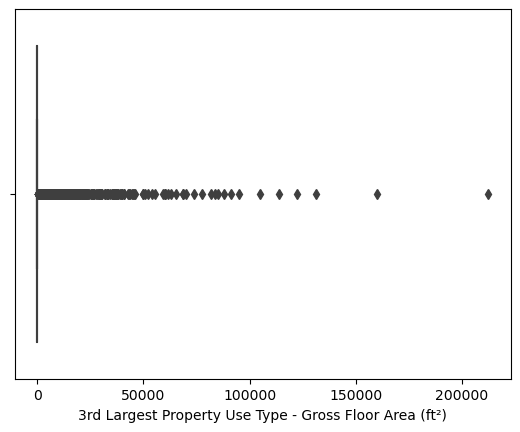

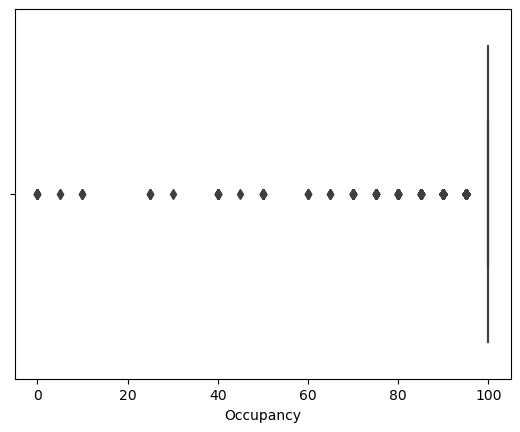

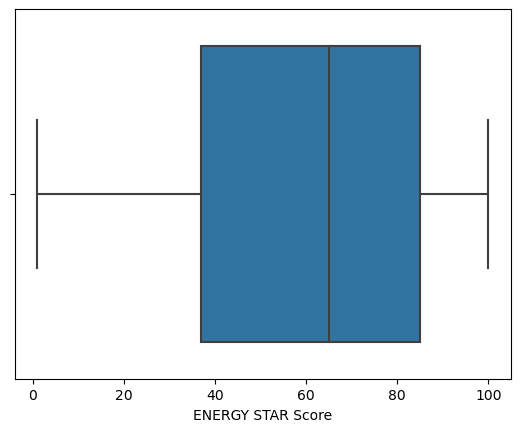

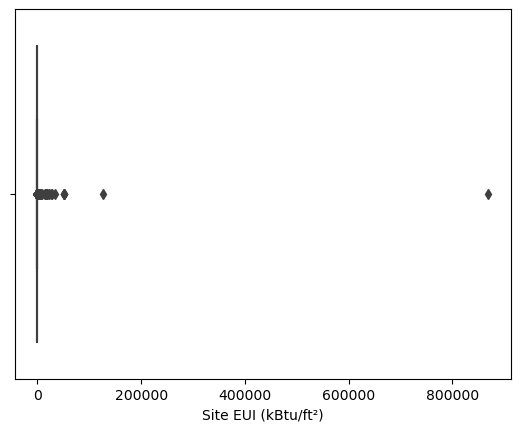

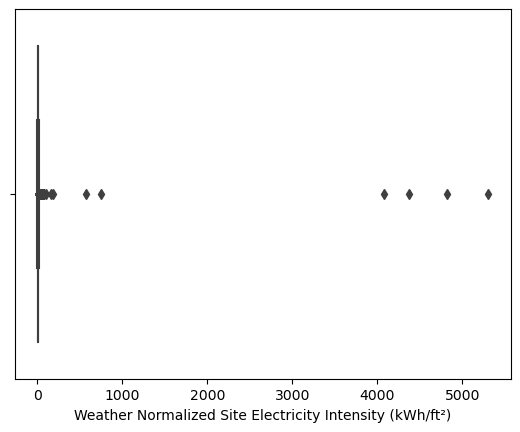

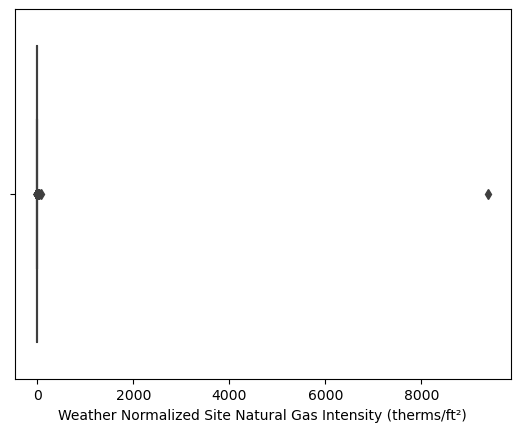

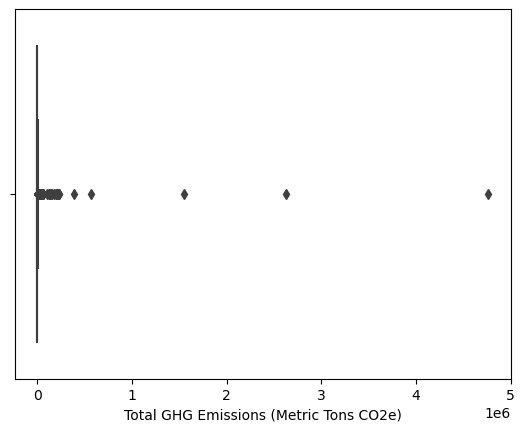

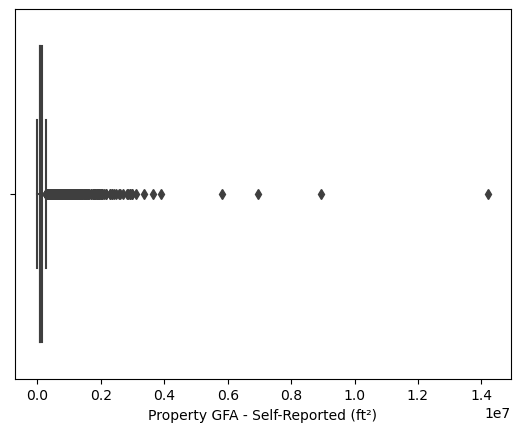

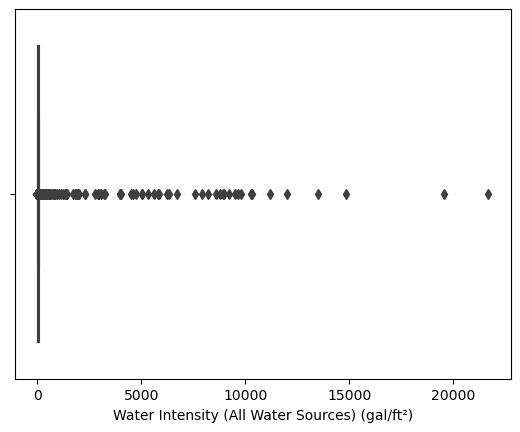

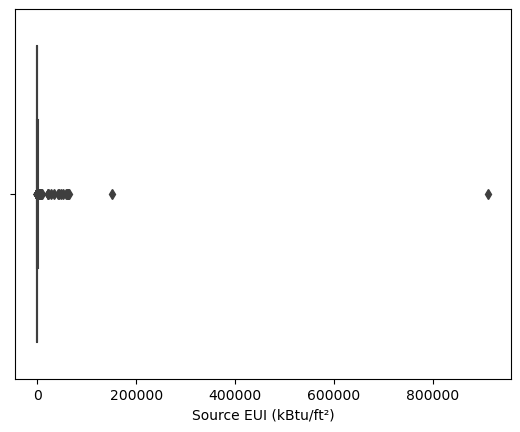

In [179]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [180]:
# Outlier treatment using iqr
outlier_list = ['Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
      '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)',
       'Water Intensity (All Water Sources) (gal/ft²)',
       'Source EUI (kBtu/ft²)']


for col in outlier_list:
    q1 = df_out[col].quantile(0.25)
    q3 = df_out[col].quantile(0.75)
    iqr = q3-q1
    
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    
    df_out[col] = np.where(df_out[col]>upper,upper,np.where(df_out[col]<lower,lower,df[col]))
    

### Checking the distribution ofthe dataset after outlier treatment

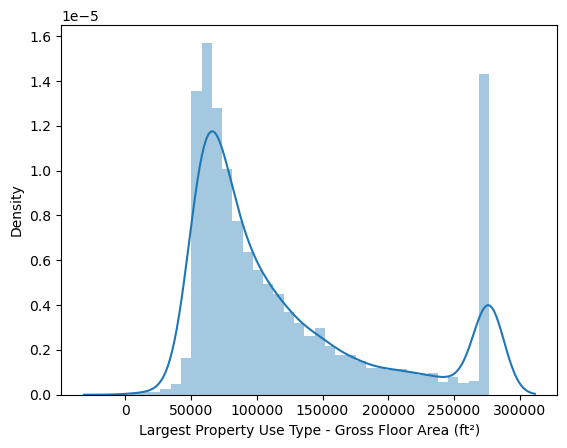

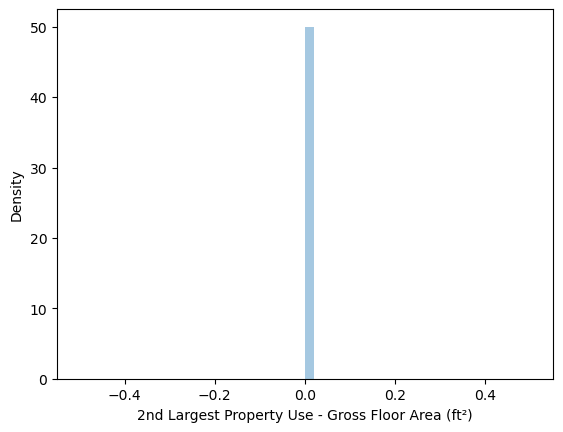

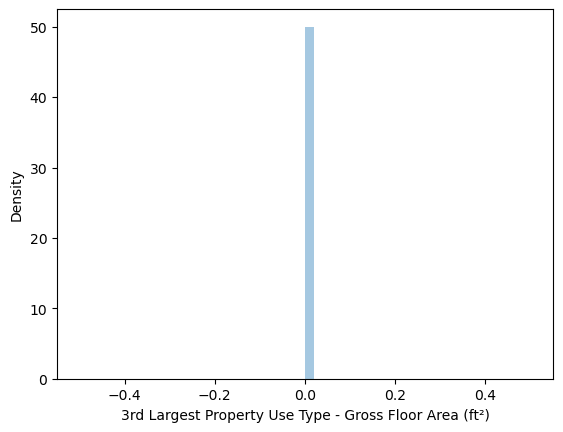

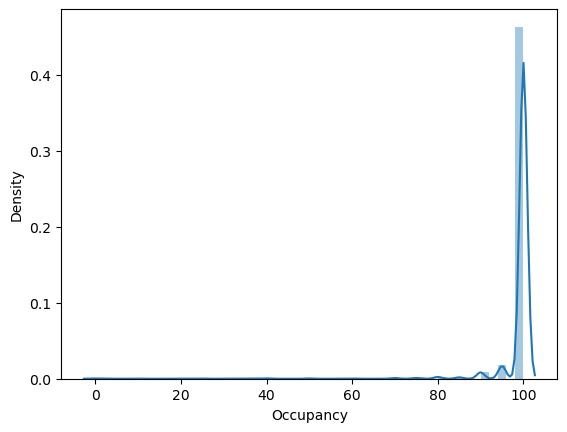

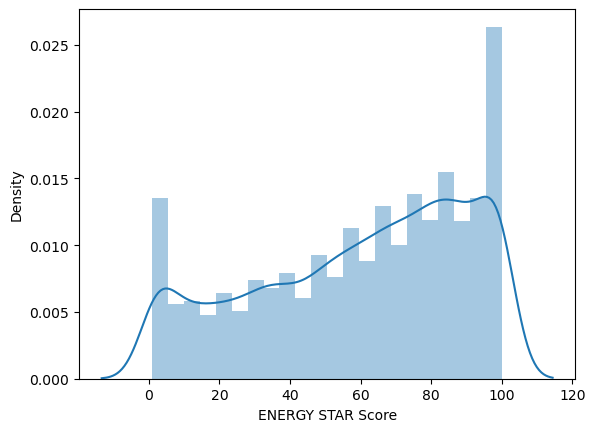

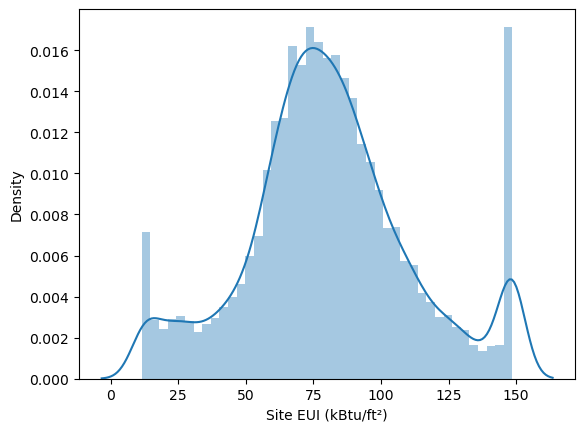

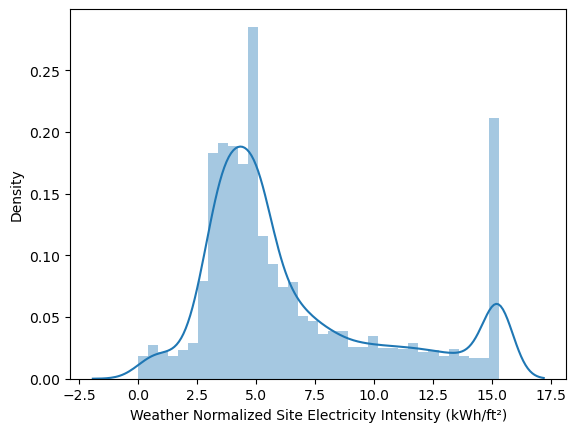

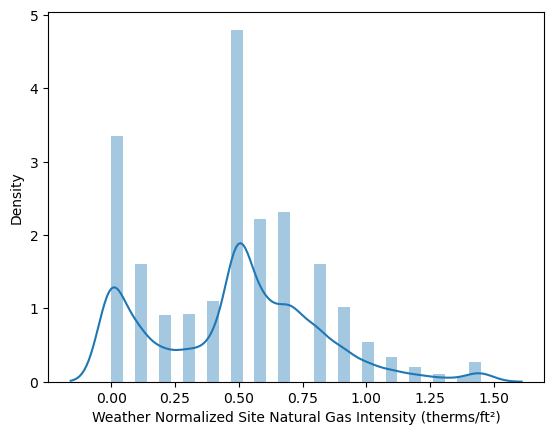

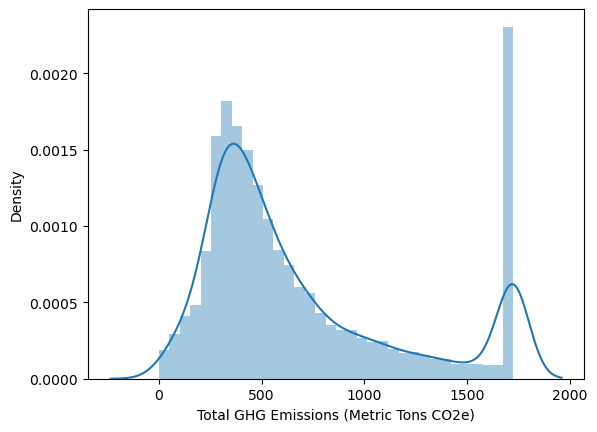

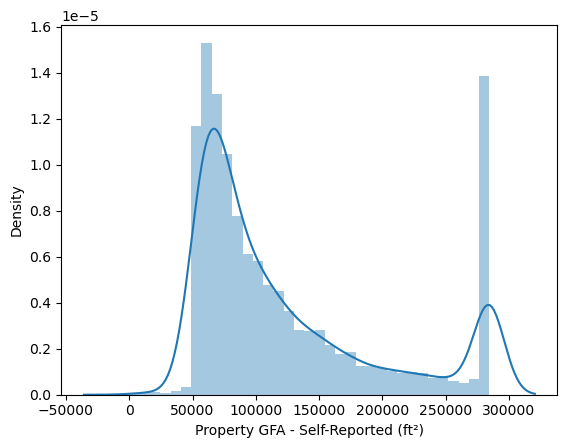

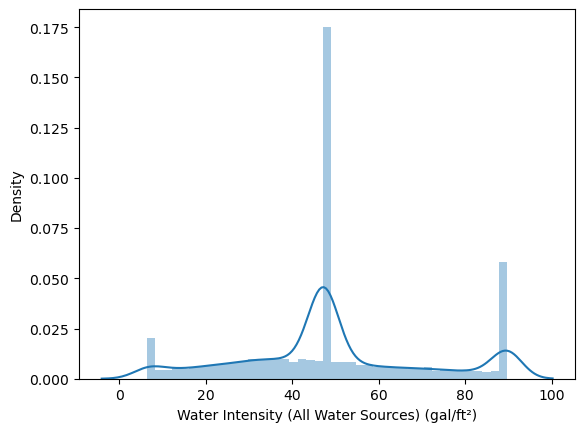

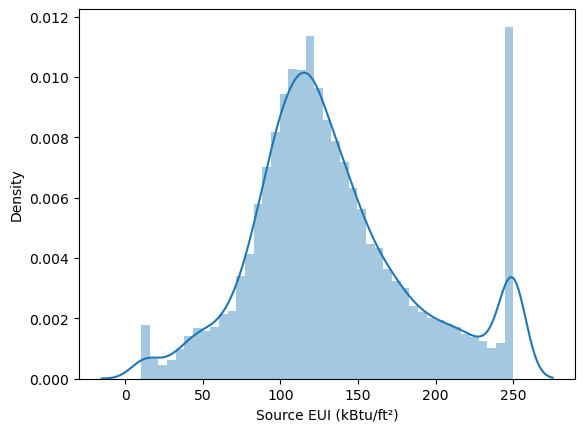

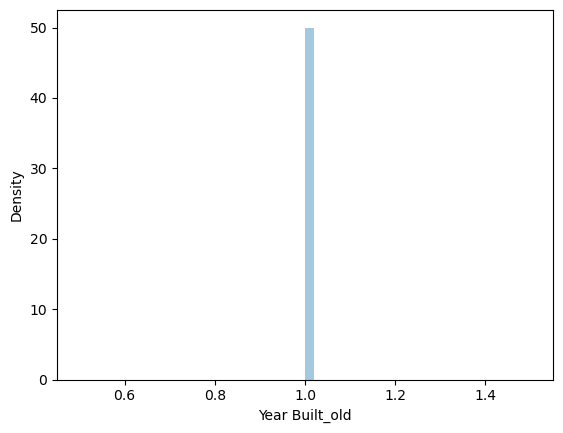

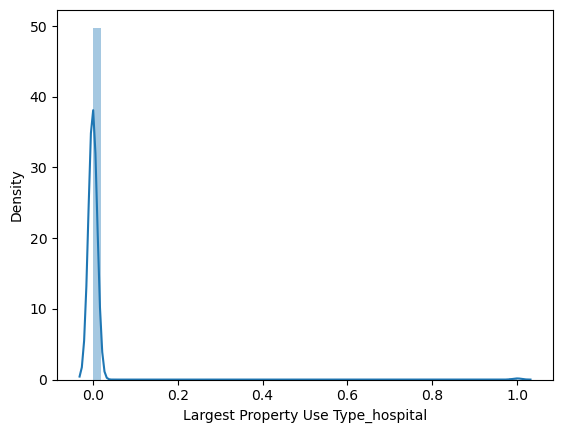

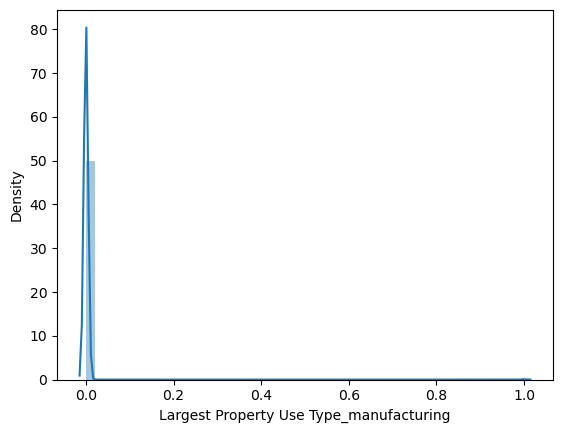

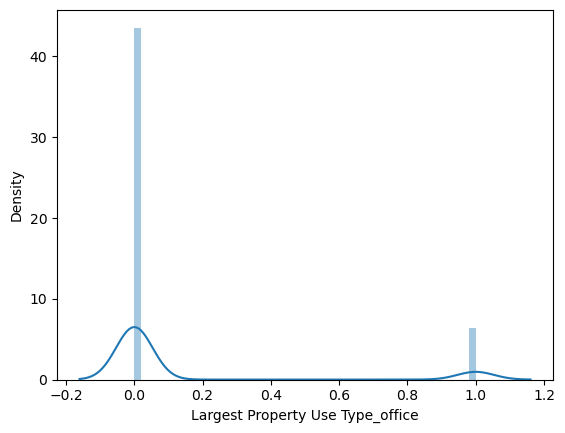

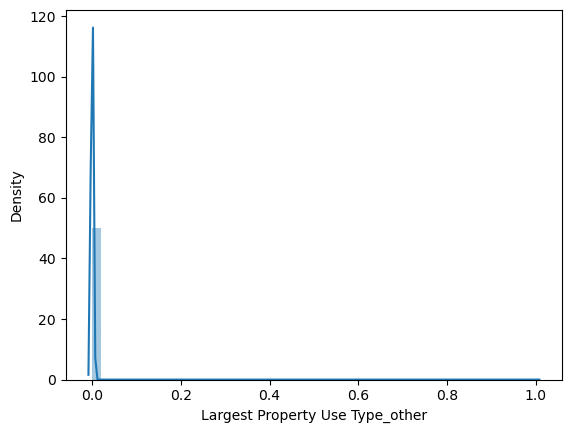

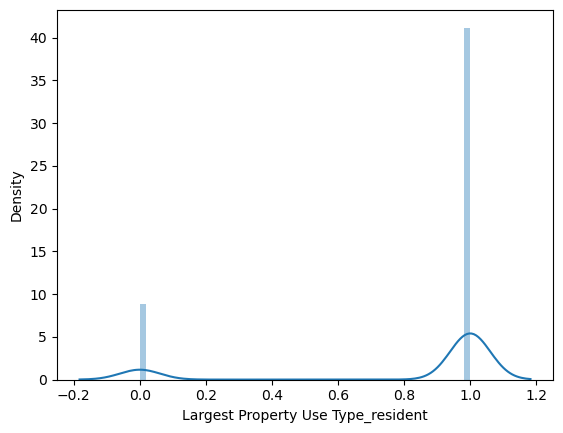

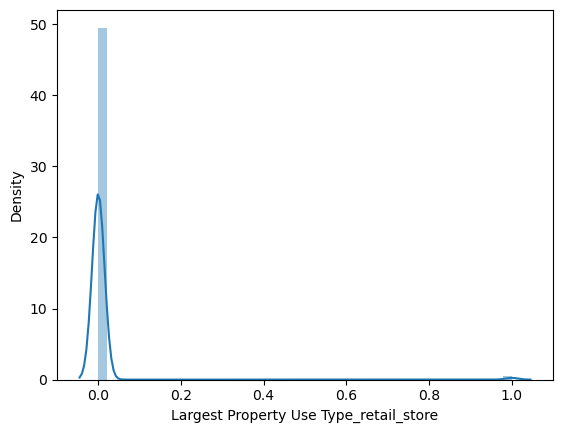

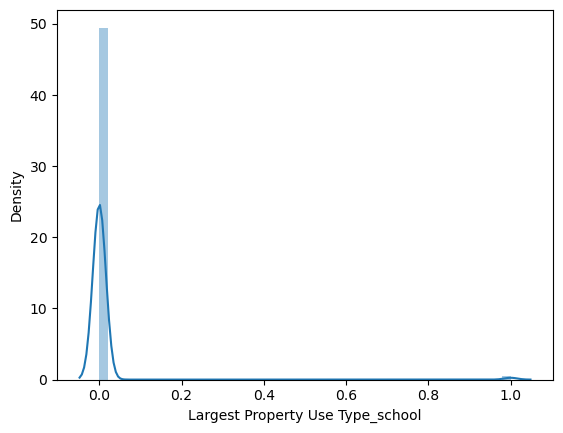

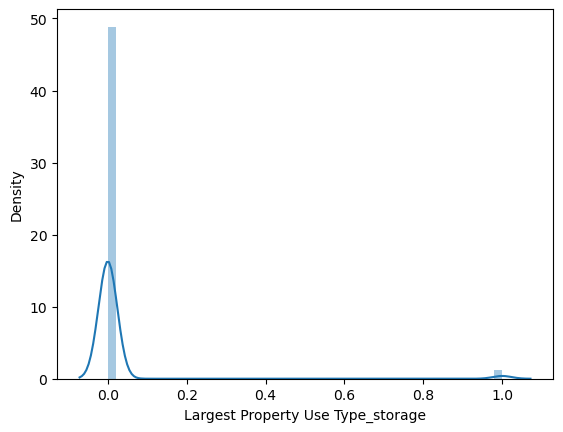

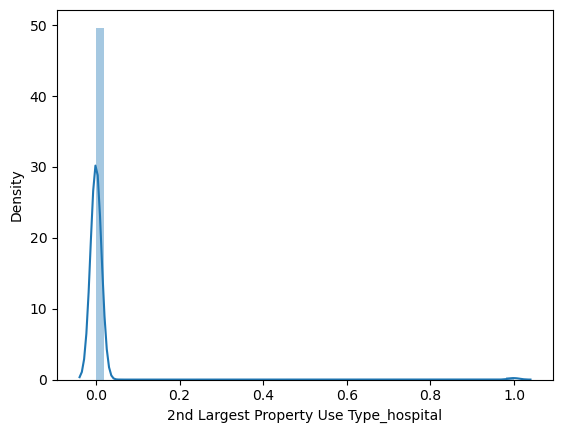

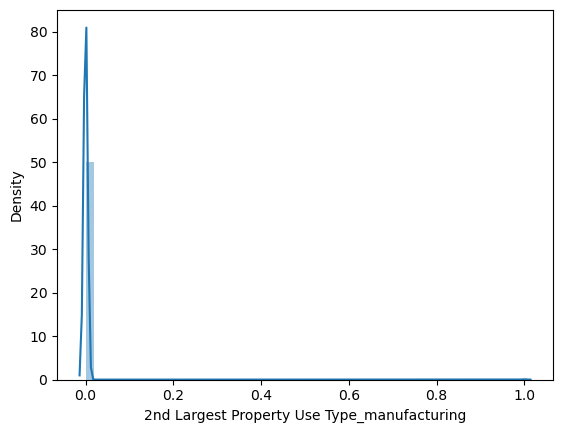

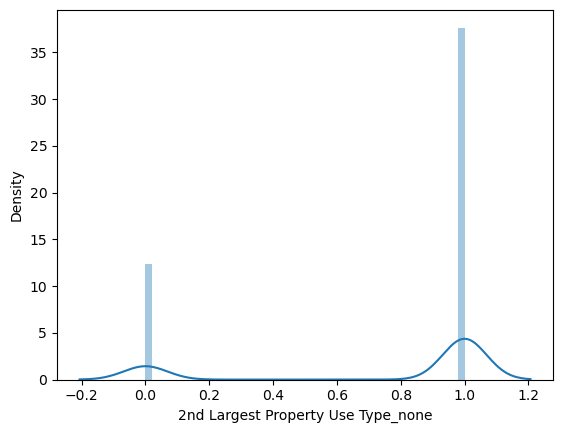

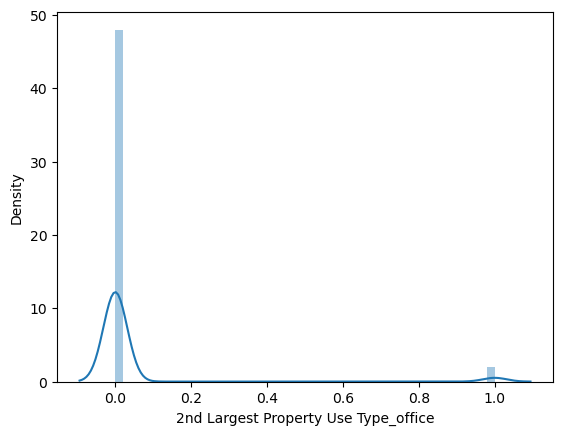

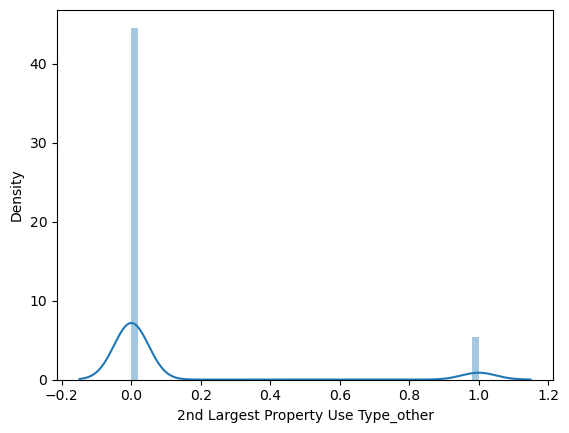

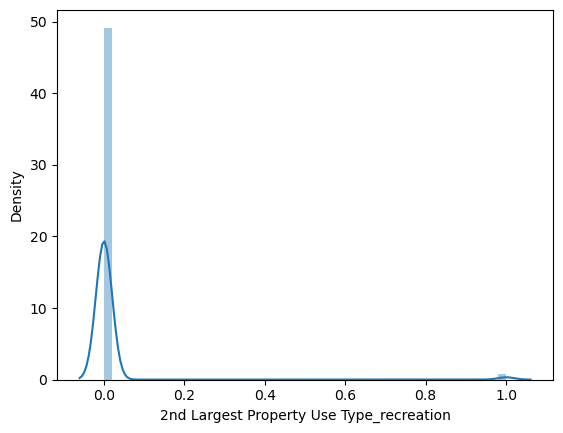

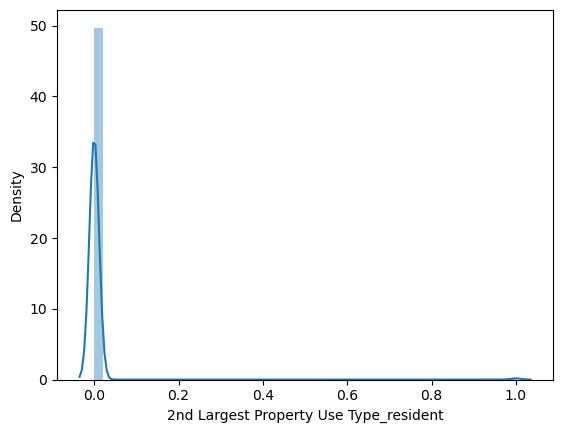

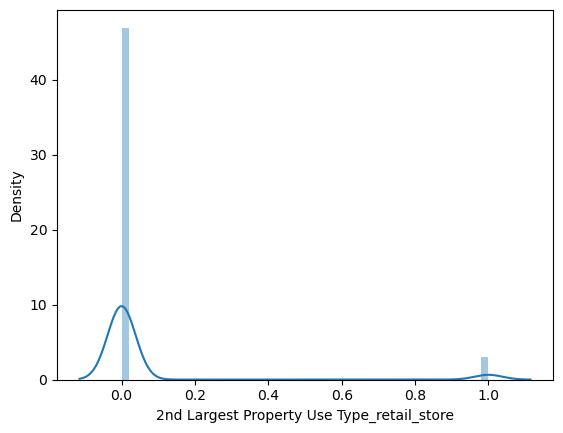

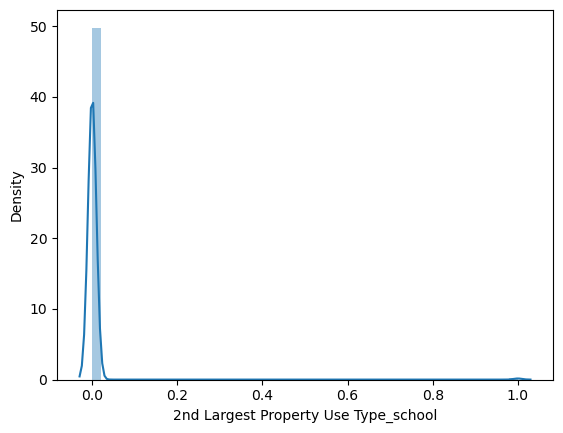

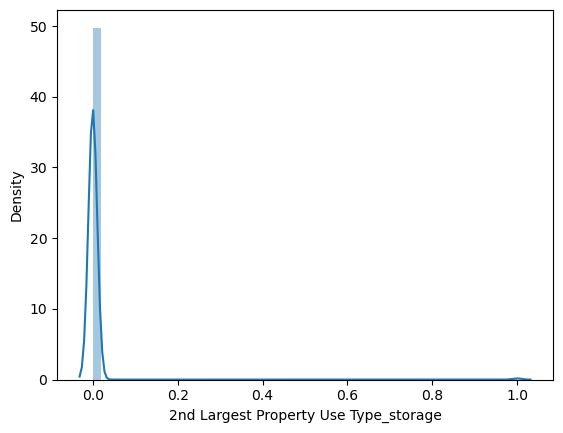

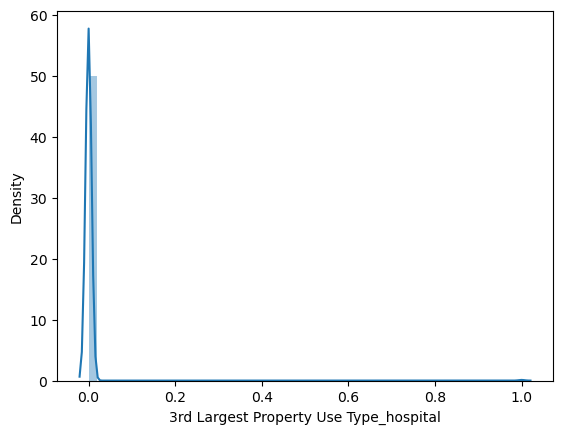

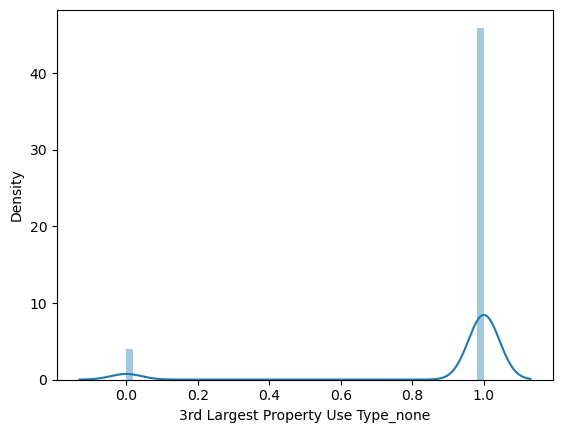

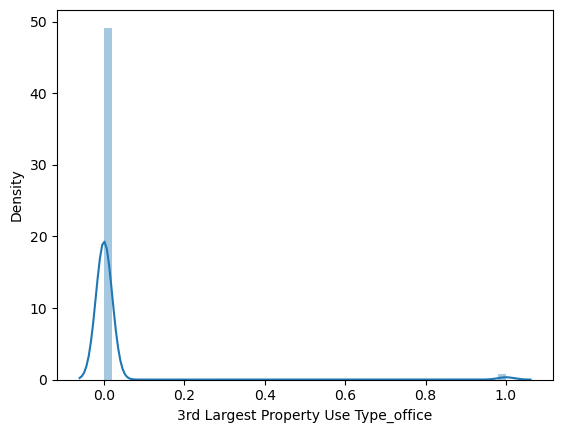

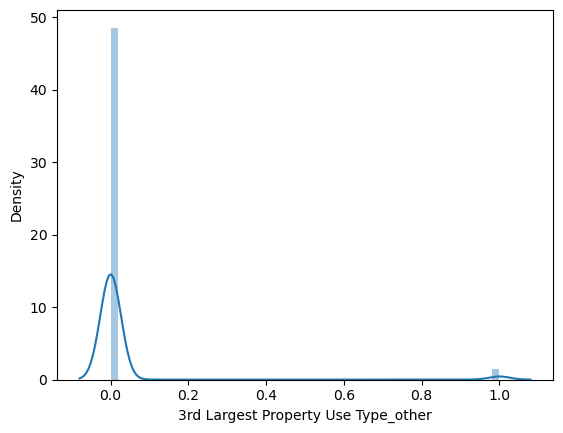

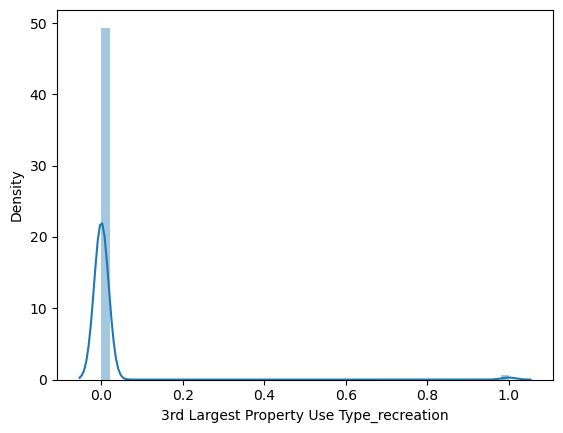

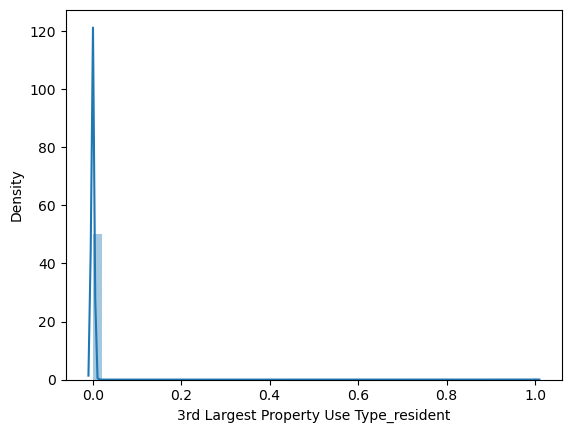

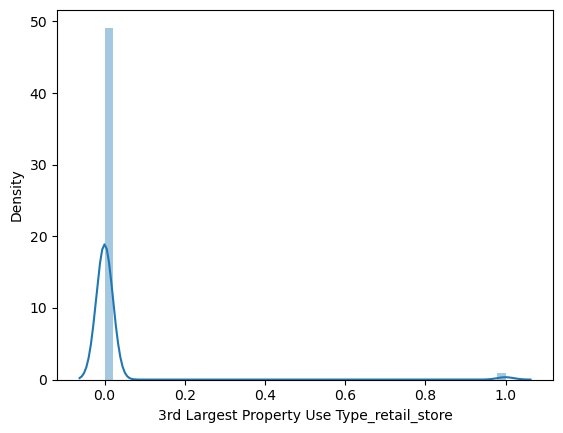

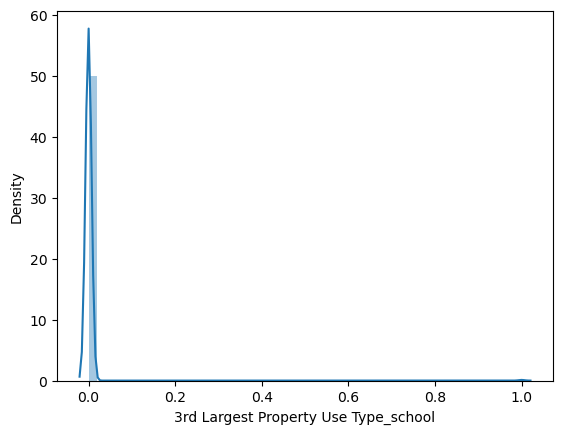

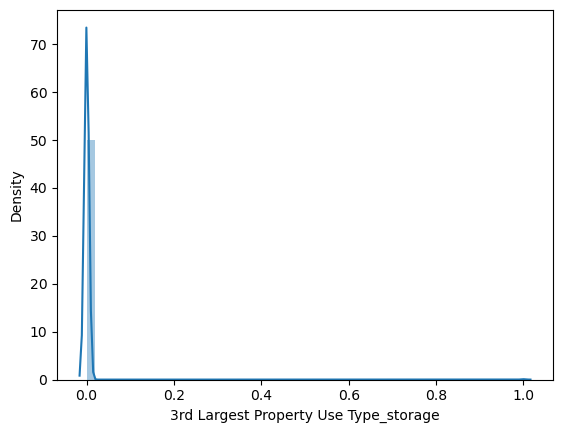

In [165]:
def distplots(col):
    sns.distplot(df_out[col])
    plt.show()
    
for i in list(df_out.columns)[0:]:
    distplots(i)

In [181]:
# One-Hot Encoding
df_out = pd.get_dummies(df_out,columns=['Year Built','Largest Property Use Type','2nd Largest Property Use Type',
                                        '3rd Largest Property Use Type'])

In [182]:
# Split the data into dependent and independent
x = df_out.drop(['ENERGY STAR Score'],axis=1)
y = df_out[['ENERGY STAR Score']]

In [183]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size =0.2, random_state=42)

# Scaling 

In [184]:
# Scaling of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)

x_test_scaler = scaler.transform(x_test)

# Modelling

In [185]:
from sklearn.metrics import r2_score, mean_absolute_error

# Linear Regression

In [186]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaler, y_train)

y_test_pred = lr.predict(x_test_scaler)

print(r2_score(y_test,y_test_pred))
print(mean_absolute_error(y_test,y_test_pred))

0.6802404357591404
13.40339644210152


# Random Forest Regressor

In [187]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

regr.fit(x_train_scaler, y_train)

y_pred_train_regr= regr.predict(x_train_scaler)
y_pred_test_regr = regr.predict(x_test_scaler)


print("Test Accuracy : ",r2_score(y_test, y_pred_test_regr))

print("Mean Absolute Error", mean_absolute_error(y_test, y_pred_test_regr))

Test Accuracy :  0.7803808607617695
Mean Absolute Error 9.838569817818263


# SVM Regressor

In [163]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_scaler, y_train)

y_pred_train_svr= svr.predict(x_train_scaler)
y_pred_test_svr = svr.predict(x_test_scaler)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_svr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_svr))

print("Mean Absolute Error", mean_absolute_error(y_test, y_pred_test_svr))

Training Accuracy :  0.7022524990351148
Test Accuracy :  0.6829985717459253
Mean Absolute Error 12.430850403646655


## Checking the accuracy of the models after using feature importance

In [200]:
global_importances = pd.Series(regr.feature_importances_, index=x_train.columns)
global_importances.sort_values(ascending=False, inplace=True) 

In [201]:
global_importances

Source EUI (kBtu/ft²)                                         0.662180
Largest Property Use Type_office                              0.097609
Site EUI (kBtu/ft²)                                           0.066878
Water Intensity (All Water Sources) (gal/ft²)                 0.027768
Total GHG Emissions (Metric Tons CO2e)                        0.023499
Weather Normalized Site Electricity Intensity (kWh/ft²)       0.021225
Largest Property Use Type - Gross Floor Area (ft²)            0.020183
Property GFA - Self-Reported (ft²)                            0.020081
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0.012888
Largest Property Use Type_storage                             0.011347
Largest Property Use Type_resident                            0.007714
Largest Property Use Type_retail_store                        0.004879
Largest Property Use Type_hospital                            0.004803
Occupancy                                                     0.003242
2nd La

In [202]:
df_ft = df_out.copy()

### Removing the columns with low importance -

In [203]:
df_ft = df_out.drop(['Year Built_old', '3rd Largest Property Use Type - Gross Floor Area (ft²)',
                     '2nd Largest Property Use - Gross Floor Area (ft²)',
                    '3rd Largest Property Use Type_resident',
                         '3rd Largest Property Use Type_storage',
                      'Largest Property Use Type_other',
                         '2nd Largest Property Use Type_school',
                         '2nd Largest Property Use Type_manufacturing'], axis =1)

# Split the data into dependent and independent
x1 = df_out.drop(['ENERGY STAR Score'],axis=1)
y1= df_out[['ENERGY STAR Score']]

# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train1,x_test1, y_train1,y_test1 = train_test_split(x1,y1, test_size =0.2, random_state=42)

# Scaling of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler1 = scaler.fit_transform(x_train1)

x_test_scaler1 = scaler.transform(x_test1)



In [204]:
# Checking the accuracy with the Linear Regressor Model
lr.fit(x_train_scaler1, y_train1)

y_test_pred1 = lr.predict(x_test_scaler1)

print(r2_score(y_test1,y_test_pred1))
print(mean_absolute_error(y_test1,y_test_pred1))

0.6802404357591404
13.40339644210152


In [205]:
# Checking the accuracy with the Random Forest Regressor Model
regr.fit(x_train_scaler1, y_train1)

y_pred_train_regr1 = regr.predict(x_train_scaler1)
y_pred_test_regr1 = regr.predict(x_test_scaler1)


print("Test Accuracy : ",r2_score(y_test1, y_pred_test_regr1))

print("Mean Absolute Error", mean_absolute_error(y_test1, y_pred_test_regr1))

Test Accuracy :  0.7765165332390893
Mean Absolute Error 9.931885120179054


## Checking the accuracy of the models after using variance inflation factor

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x_train_scaler

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x.columns
vif

,Variance Inflation Factor,Features
0,104.855027,Largest Property Use Type - Gross Floor Area (...
1,NaN,2nd Largest Property Use - Gross Floor Area (ft²)
2,NaN,3rd Largest Property Use Type - Gross Floor Ar...
3,1.041791,Occupancy
4,14.800993,Site EUI (kBtu/ft²)
5,9.918471,Weather Normalized Site Electricity Intensity ...
6,1.518060,Weather Normalized Site Natural Gas Intensity ...
7,12.047123,Total GHG Emissions (Metric Tons CO2e)
8,112.311283,Property GFA - Self-Reported (ft²)
9,1.266338,Water Intensity (All Water Sources) (gal/ft²)


In [168]:
v1 = x_train.drop(['Largest Property Use Type - Gross Floor Area (ft²)','Property GFA - Self-Reported (ft²)'],axis = 1)

In [170]:
v1_scaler = scaler.fit_transform(v1)

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = v1_scaler

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = v1.columns
vif

,Variance Inflation Factor,Features
0,NaN,2nd Largest Property Use - Gross Floor Area (ft²)
1,NaN,3rd Largest Property Use Type - Gross Floor Ar...
2,1.040123,Occupancy
3,13.607491,Site EUI (kBtu/ft²)
4,9.917199,Weather Normalized Site Electricity Intensity ...
5,1.459265,Weather Normalized Site Natural Gas Intensity ...
6,1.737355,Total GHG Emissions (Metric Tons CO2e)
7,1.265768,Water Intensity (All Water Sources) (gal/ft²)
8,28.742808,Source EUI (kBtu/ft²)
9,NaN,Year Built_old


In [172]:
v2 = v1.drop(['Source EUI (kBtu/ft²)'], axis = 1)
v2_scaler = scaler.fit_transform(v2)
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = v2_scaler

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = v2.columns
vif

,Variance Inflation Factor,Features
0,NaN,2nd Largest Property Use - Gross Floor Area (ft²)
1,NaN,3rd Largest Property Use Type - Gross Floor Ar...
2,1.040004,Occupancy
3,1.977435,Site EUI (kBtu/ft²)
4,2.020785,Weather Normalized Site Electricity Intensity ...
5,1.459264,Weather Normalized Site Natural Gas Intensity ...
6,1.713241,Total GHG Emissions (Metric Tons CO2e)
7,1.264729,Water Intensity (All Water Sources) (gal/ft²)
8,NaN,Year Built_old
9,inf,Largest Property Use Type_hospital


In [173]:
x_test_v2 = x_test.drop(['Source EUI (kBtu/ft²)','Largest Property Use Type - Gross Floor Area (ft²)','Property GFA - Self-Reported (ft²)'], axis = 1)
x_test_v2_scaler = scaler.transform(x_test_v2)

In [174]:
lr = LinearRegression()
lr.fit(v2_scaler, y_train)

y_test_pred = lr.predict(x_test_v2_scaler)

print(r2_score(y_test,y_test_pred))
print(mean_absolute_error(y_test,y_test_pred))

0.6695235284092664
13.640482939597097


In [175]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

regr.fit(v2_scaler, y_train)

y_pred_train_regr= regr.predict(v2_scaler)
y_pred_test_regr = regr.predict(x_test_v2_scaler)


print("Test Accuracy : ",r2_score(y_test, y_pred_test_regr))

print("Mean Absolute Error", mean_absolute_error(y_test, y_pred_test_regr))

Test Accuracy :  0.755142830985849
Mean Absolute Error 10.35868311980054


# Conclusion :
### Random Forest Regressor result -
 * Test Accuracy :  0.7803808607617695
 * Mean Absolute Error 9.838569817818263